In [1]:
import pandas as pd

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Загрузите датасет, используя ; в качестве разделителя. 
# Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как
# даты (параметр parse_dates).
# Результат запишите в taxi
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')

In [34]:
# Проверьте, с какой платформы было сделано больше всего заказов.
# В ответе укажите значение в %, округлённое до целого.

taxi.source.value_counts().max()

9741

In [35]:
taxi.source.value_counts().sum()

22988

In [38]:
(taxi.source.value_counts().max() / taxi.source.value_counts().sum() * 100).round()

42.0

In [42]:
#тоже самое с value_counts normalize
(taxi.source.value_counts(normalize='True')*100).round().max()

42.0

In [67]:
# 1. Посчитайте частоту встречаемости каждой из оценок
# 2. Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
# 3. Сбросьте индексы
# 4. Переименуйте колонки в driver_score и percentage
# 5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
# 6. Запишите результат в driver_score_counts
driver_score_counts = taxi.driver_score \
    .value_counts(normalize='True') \
    .mul(100).round(2) \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')

In [68]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


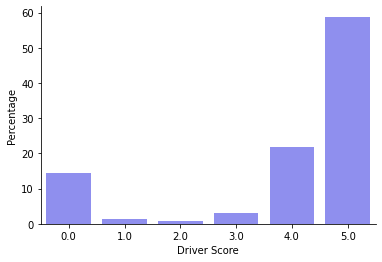

In [76]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver Score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [90]:
# Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
# В чем его отличие от распределения оценок водителей?

rider_score_counts = taxi.rider_score \
     .value_counts(normalize='True') \
     .mul(100).round(2) \
     .reset_index() \
     .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
     .sort_values('rider_score')

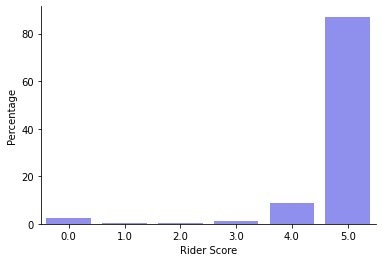

In [100]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider Score', ylabel='Percentage')
sns.despine()
plt.show()